In [5]:
import pandas as pd

# Read in certain data and verify
filename = "beaches.csv"

fields = ['Beach Name', 'County','BeachLength (Mi)', 'Ownership Type','Accessibility Type', 'Special Note', 'Link Note']

df = pd.read_csv(filename, usecols=fields)

stats = df[['BeachLength (Mi)', 'Ownership Type', 'Accessibility Type']]

stats.head()

,BeachLength (Mi),Ownership Type,Accessibility Type
0,0.085,Municipal,2
1,0.057,Municipal,2
2,0.022,Municipal,2
3,0.232,Municipal,2
4,0.046,Municipal,1


In [75]:
ownership = stats.groupby('Ownership Type').size()
print(ownership)

municipalSize = ownership['Municipal'] + ownership['Municipal '] + ownership['Municipality'] + ownership['Municpal']
federalSize = ownership['Federal']
stateSize = ownership['State']
nonprofitSize = ownership['Non-profit'] + ownership['Nonprofit']
otherSize = ownership['Other']
privateSize = ownership['Private'] + ownership['Hotel']

totalOwnershipSize = municipalSize + federalSize + stateSize + nonprofitSize + otherSize + privateSize


Ownership Type
Federal           5
Hotel             2
Municipal       299
Municipal        10
Municipality     33
Municpal          4
Non-profit       10
Nonprofit         1
Other             6
Private          17
Public            1
State            31
dtype: int64


In [79]:
#access = stats.groupby('Accessibility Type').size()
#print(access)

#publicSize = access['0']
#quasiPublicSize = access['1']
#privateAccessSize = access['2']

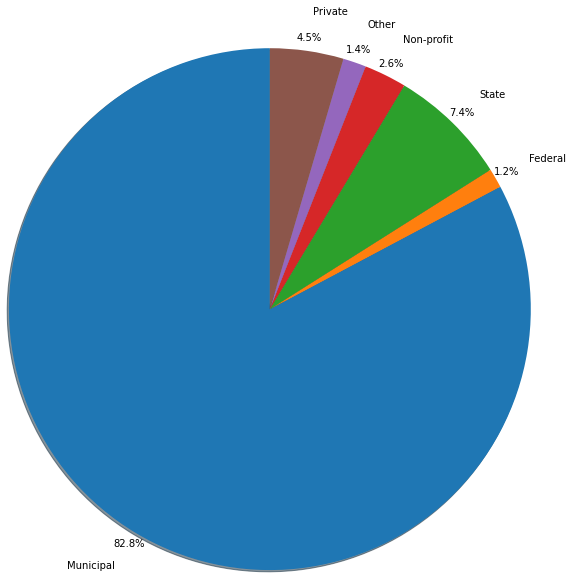

In [77]:
import matplotlib.pyplot as plt

# Create pie charts

#Ownership type pie chart
labels = ['Municipal', 'Federal', 'State','Non-profit', 'Other', 'Private']
sizes = [
    municipalSize*100/totalOwnershipSize,
    federalSize*100/totalOwnershipSize,
    stateSize*100/totalOwnershipSize,
    nonprofitSize*100/totalOwnershipSize,
    otherSize*100/totalOwnershipSize,
    privateSize*100/totalOwnershipSize
]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, radius=3, pctdistance=1.05, labeldistance=1.15)
plt.show()


                BeachLength (Mi)
Ownership Type                  
Federal                    2.073
Hotel                      0.425
Municipal                 74.358
Municipal                  2.739
Municipality               5.313
Municpal                   0.367
Non-profit                 5.781
Nonprofit                  0.600
Other                      0.835
Private                    7.618
Public                     0.123
State                     29.493


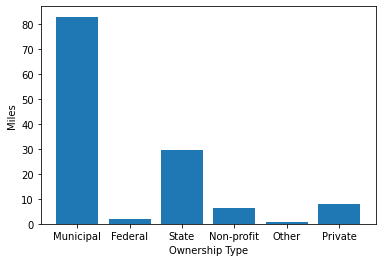

In [78]:
ownershipLengths = stats.groupby('Ownership Type').sum()
print(ownershipLengths)

municipalLength = ownershipLengths.loc['Municipal','BeachLength (Mi)'] + ownershipLengths.loc['Municipal ','BeachLength (Mi)'] + ownershipLengths.loc['Municipality','BeachLength (Mi)'] + ownershipLengths.loc['Municpal','BeachLength (Mi)']
federalLength = ownershipLengths.loc['Federal','BeachLength (Mi)']
stateLength = ownershipLengths.loc['State','BeachLength (Mi)']
nonprofitLength = ownershipLengths.loc['Non-profit','BeachLength (Mi)'] + ownershipLengths.loc['Nonprofit','BeachLength (Mi)']
otherLength = ownershipLengths.loc['Other','BeachLength (Mi)']
privateLength = ownershipLengths.loc['Private','BeachLength (Mi)'] + ownershipLengths.loc['Hotel','BeachLength (Mi)']

# Bar chart for lengths of each ownership type
lengths = [municipalLength, federalLength, stateLength, nonprofitLength, otherLength, privateLength]

fig, ax = plt.subplots()
ax.bar(x=range(len(labels)), height=lengths)
plt.xticks(range(len(labels)), labels)
plt.ylabel('Miles')
plt.xlabel('Ownership Type')
plt.show()
